<a href="https://colab.research.google.com/github/Mottarav/Ciencia-de-dados/blob/main/Estatistica_EDA_startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ETAPA 0 - CARREGAMENTO DAS BIBLIOTECAS

In [ ]:
!pip install sidetable 
!pip install pandas-profiling==3.3.0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
import patsy as pt
from google.colab import drive
from sklearn import metrics
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
import plotly.express as px
import sidetable
import pandas_profiling
import missingno as msno

## CARREGAMENTO, EDA E PRÉ-PROCESSAMENTO

In [ ]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### nulos e outliers

In [ ]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

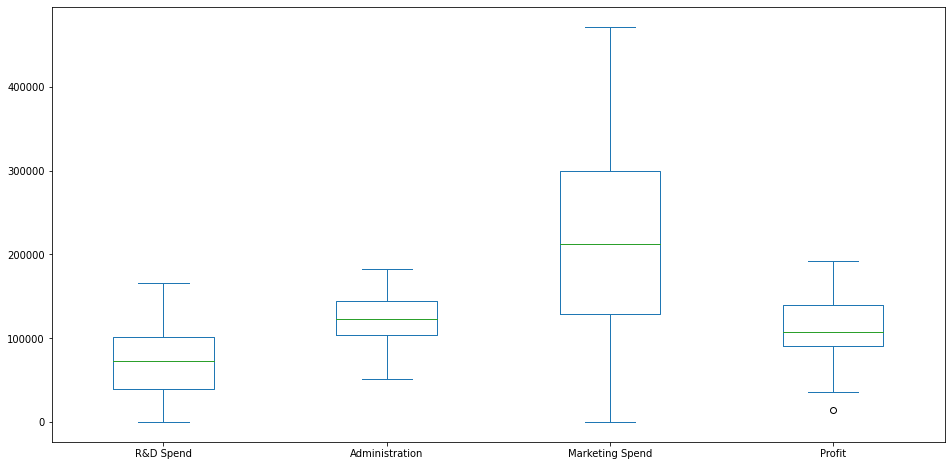

In [ ]:
df.plot.box(figsize=[16,8]);

### grupo by por estado

In [ ]:
df['Soma_dos_investimentos'] = df['Administration'] + df['Marketing Spend'] + df['R&D Spend']
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Soma_dos_investimentos
0,165349.20,136897.80,471784.10,New York,192261.83,774031.10
1,162597.70,151377.59,443898.53,California,191792.06,757873.82
2,153441.51,101145.55,407934.54,Florida,191050.39,662521.60
3,144372.41,118671.85,383199.62,New York,182901.99,646243.88
4,142107.34,91391.77,366168.42,Florida,166187.94,599667.53


In [ ]:
df.groupby(['State']).sum().round(2)

,R&D Spend,Administration,Marketing Spend,Profit,Soma_dos_investimentos
State,,,,,
California,1099180.46,2052690.62,3103195.80,1766387.98,6255066.88
Florida,1291584.26,1948302.36,3957176.82,1900384.39,7197063.44
New York,1295316.06,2066239.00,3490882.27,1933859.59,6852437.33


In [ ]:
#df = pd.get_dummies(df)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Soma_dos_investimentos,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,774031.10,0,0,1
1,162597.70,151377.59,443898.53,191792.06,757873.82,1,0,0
2,153441.51,101145.55,407934.54,191050.39,662521.60,0,1,0
3,144372.41,118671.85,383199.62,182901.99,646243.88,0,0,1
4,142107.34,91391.77,366168.42,166187.94,599667.53,0,1,0


In [ ]:
#df_corr = df.corr().round(2)
#df_corr.head()

,R&D Spend,Administration,Marketing Spend,Profit,Soma_dos_investimentos,State_California,State_Florida,State_New York
R&D Spend,1.00,0.24,0.72,0.97,0.87,-0.14,0.11,0.04
Administration,0.24,1.00,-0.03,0.20,0.22,-0.02,0.01,0.01
Marketing Spend,0.72,-0.03,1.00,0.75,0.95,-0.17,0.21,-0.03
Profit,0.97,0.20,0.75,1.00,0.87,-0.15,0.12,0.03
Soma_dos_investimentos,0.87,0.22,0.95,0.87,1.00,-0.17,0.19,-0.01


### ANALISE GRAFICA

In [ ]:
cont_col = list(df.select_dtypes(include='number').columns)
cont_col

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'Profit',
 'Soma_dos_investimentos',
 'State_California',
 'State_Florida',
 'State_New York']

In [ ]:
ncols = 3

In [ ]:
nrows = int(np.ceil(len(cont_col)/(1.0 * ncols)))

#### plotando graficos

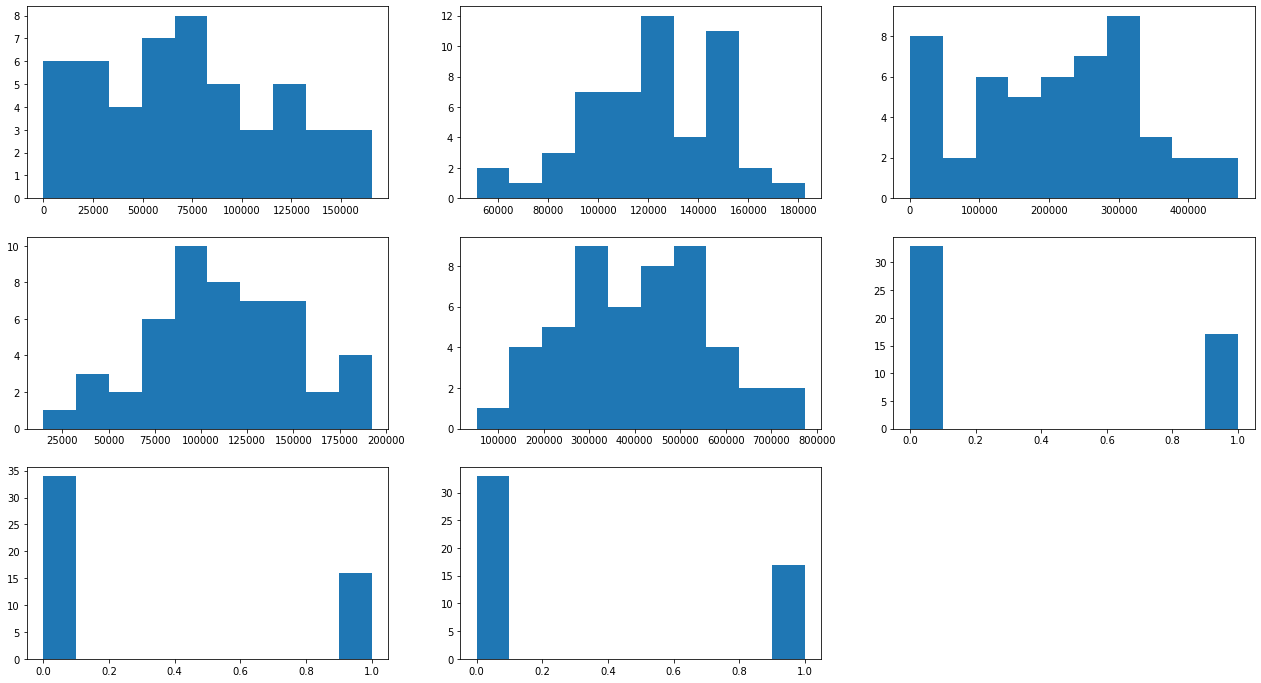

In [ ]:
# montando subplots 
fig, axes = plt.subplots(nrows=nrows,ncols=ncols, figsize=[22,12])

counter = 0

for i in range(nrows):
  for j in range(ncols):
    ax = axes[i][j]


    if counter < len(cont_col):
      ax.hist(df.select_dtypes(include='number')[cont_col[counter]],bins=10)
    else:
      ax.set_axis_off()
    counter+=1
plt.show()

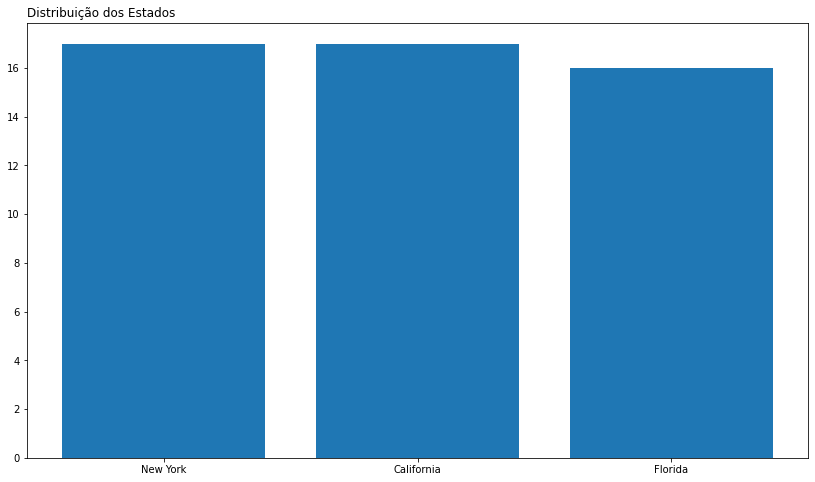

In [ ]:
# grafico de barras
fig = plt.figure(figsize=[14,8])

plt.bar(df['State'].unique(), df['State'].value_counts())

plt.title('Distribuição dos Estados', loc='left');

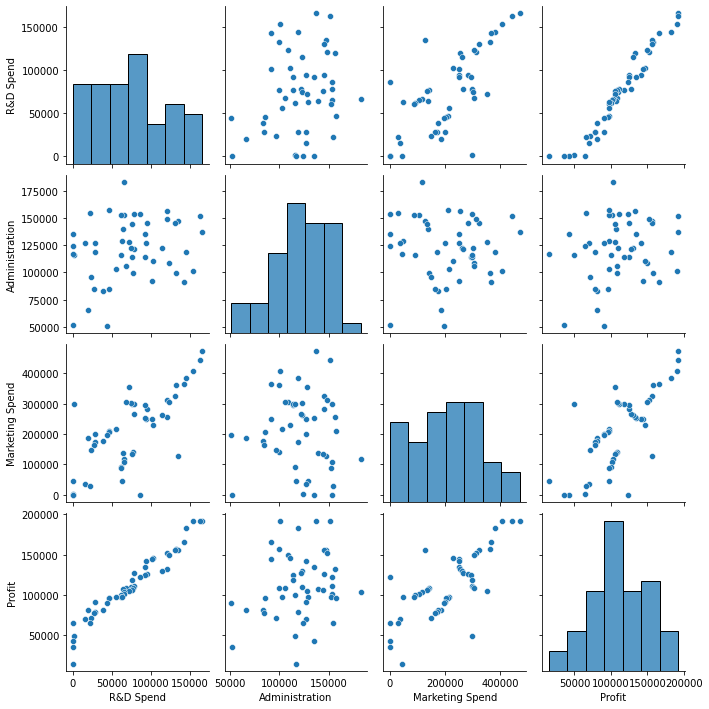

In [ ]:
# grafico de correlação
sns.pairplot(df)

Text(0, 0.5, '')

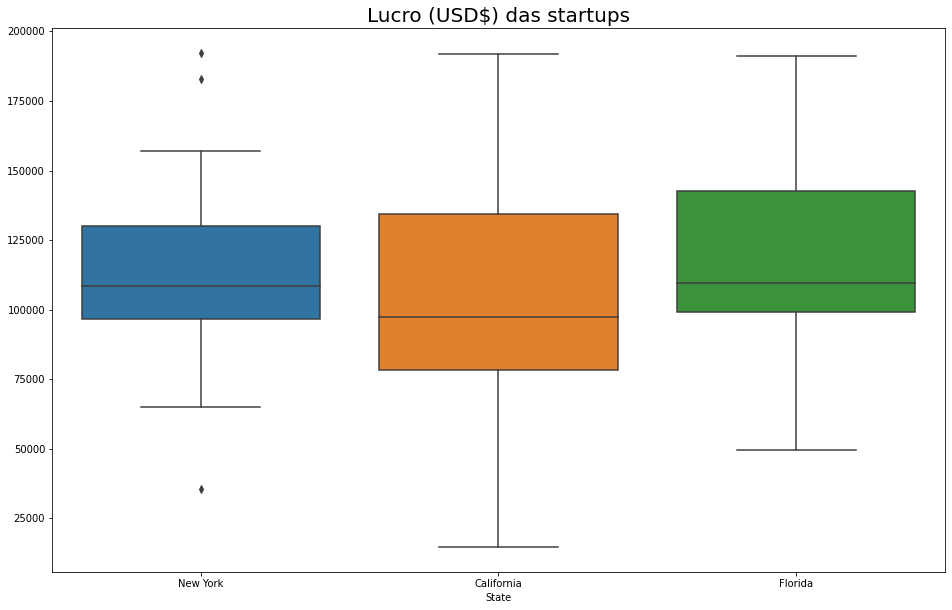

In [ ]:
# boxplot state e profit
fig = plt.figure(figsize=[16,10])
sns.boxplot(x=df['State'],y=df['Profit'])
plt.title('Lucro (USD$) das startups', fontsize=20)
plt.ylabel('')

### variaveis continuas e categoricas

#### variaveis continuas

In [ ]:
dfnum = df.select_dtypes(include='number').drop(['Profit'],axis =1 )
dfnum.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


#### variaveis categoricas

In [ ]:
# mudar variavel state para category
df['State'] = df['State'].astype('category')

# selecionar apenas variaveis categoricas
dfcat = df.select_dtypes(include='category')
dfcat.head()

,State
0,New York
1,California
2,Florida
3,New York
4,Florida


#### resposta

In [ ]:
y = df['Profit']

#### pré tratamento da resposta

##### teste resposta original

In [ ]:
kstat, kpvalue = sp.stats.kstest(rvs=y,cdf='norm')

In [ ]:
kstat

1.0

In [ ]:
kpvalue

0.0

##### teste log resposta

In [ ]:
kstat, kpvalue = sp.stats.kstest(rvs=np.log(y), cdf='norm')

In [ ]:
print(kstat, kpvalue)

1.0 0.0


#### pré tratamento das variaveis continuas

In [ ]:
# criar função para escalonammento dos dados
def feat_scale(X):

  #calcular a média de todas as variaveis
  mu = np.mean(X, axis=0)

  # calcular desvio padrão das variaveis
  sigma = np.std(X, axis=0, ddof=1)

  # fazer escalonamento das variaveis
  xnorm = (X - mu)/sigma

  return xnorm

In [ ]:
dfnorm = feat_scale(dfnum)
dfnorm.head()

,R&D Spend,Administration,Marketing Spend
0,1.996146,0.555117,2.132295
1,1.936203,1.071924,1.904267
2,1.736731,-0.720938,1.610180
3,1.539157,-0.095396,1.407916
4,1.489812,-1.069066,1.268648


#### pré tratamento das variaveis categoricas

In [ ]:
dfdumm = pd.get_dummies(dfcat)
dfdumm.head()

,State_California,State_Florida,State_New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


#### unir os 2 dataframes dfnorm e dfdumm (concatenar)

In [ ]:
df_final = pd.concat([dfnorm, dfdumm], axis=1)
df_final.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,1.996146,0.555117,2.132295,0,0,1
1,1.936203,1.071924,1.904267,1,0,0
2,1.736731,-0.720938,1.610180,0,1,0
3,1.539157,-0.095396,1.407916,0,0,1
4,1.489812,-1.069066,1.268648,0,1,0
